In [1]:
import json
import pandas as pd
import mysql.connector
import os
import seaborn as sns

In [2]:
df = pd.read_json("C:\\Users\\abhishek pankaj\\Downloads\\loan_data.json")
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [3]:
df.shape

(511, 10)

In [4]:
df.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [6]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [7]:
mydb=mysql.connector.connect(
                             host="localhost",
                             user='root',
                             password="2222",
                             db="apr")

print(mydb)

In [8]:
table=pd.read_sql_query("SHOW TABLES FROM apr" ,mydb)

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
table

,Tables_in_apr
0,loan_data


In [10]:
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('loan_data',)


# 1. Find % of total applicants for each unique value of dependents.

In [11]:
Mycursor = mydb.cursor()
print("  % of total applicants foR those whose dependent is 0")

mycursor.execute("select COUNT(Application_ID)*100/511 FROM loan_data WHERE Dependents=0 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

  % of total applicants foR those whose dependent is 0
(Decimal('57.5342'),)


In [12]:
Mycursor = mydb.cursor()
print("  % of total applicants foR those whose dependent is 1")

mycursor.execute("select COUNT(Application_ID)*100/511 FROM loan_data WHERE Dependents=1 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

  % of total applicants foR those whose dependent is 1
(Decimal('16.6341'),)


In [13]:
Mycursor = mydb.cursor()
print("  % of total applicants foR those whose dependent is 2")

mycursor.execute("select COUNT(Application_ID)*100/511 FROM loan_data WHERE Dependents=2 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

  % of total applicants foR those whose dependent is 2
(Decimal('17.2211'),)


In [14]:
Mycursor = mydb.cursor()
print("  % of total applicants foR those whose dependent is 3")

mycursor.execute("select COUNT(Application_ID)*100/511 FROM loan_data WHERE Dependents=3 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

  % of total applicants foR those whose dependent is 3
(Decimal('8.6106'),)


# 2) Find the average number of dependents per applicant

In [15]:
mycursor = mydb.cursor()
print(" average number of dependents per applicant whose dependent is 0")

mycursor.execute("select COUNT(Application_ID) FROM loan_data WHERE Dependents=0 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 average number of dependents per applicant whose dependent is 0
(294,)


In [16]:
mycursor = mydb.cursor()
print(" average number of dependents per applicant whose dependent is 1")

mycursor.execute("select COUNT(Application_ID) FROM loan_data WHERE Dependents=1 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 average number of dependents per applicant whose dependent is 1
(85,)


In [17]:
mycursor = mydb.cursor()
print(" average number of dependents per applicant whose dependent are 2")

mycursor.execute("select COUNT(Application_ID) FROM loan_data WHERE Dependents=2 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 average number of dependents per applicant whose dependent are 2
(88,)


In [18]:
mycursor = mydb.cursor()
print(" average number of dependents per applicant whose dependent are 3")

mycursor.execute("select COUNT(Application_ID) FROM loan_data WHERE Dependents=3 ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 average number of dependents per applicant whose dependent are 3
(44,)


# 3) Find the %of applications approved for self-employed applicants

In [19]:
mycursor = mydb.cursor()
print(" the % of applications approved for self-employed applicants")

mycursor.execute("select count(*)*100/511 from loan_data where Self_Employed ='Yes' and Application_Status ='Y' ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 the % of applications approved for self-employed applicants
(Decimal('9.0020'),)


# 4. What is the % of rejections for married male applicants?


In [20]:
mycursor = mydb.cursor()
print(" the % of rejections for married male applicants")

mycursor.execute("select count(*)*100/511 from loan_data where Gender='Male' and Application_Status ='N' ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 the % of rejections for married male applicants
(Decimal('25.4403'),)


# 5 ) Which property area has the maximum approval ratio.

In [21]:
mycursor = mydb.cursor()
print(" RURAL has the maximum approval ratio.")

mycursor.execute("select COUNT(Property_Area='Rural')from loan_data where Application_Status ='Y' AND Property_Area='Rural'  ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 RURAL has the maximum approval ratio.
(90,)


In [22]:
mycursor = mydb.cursor()
print(" URBAN has the maximum approval ratio.")

mycursor.execute("select COUNT(Property_Area)from loan_data where Application_Status ='Y' AND Property_Area='Urban'  ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 URBAN has the maximum approval ratio.
(104,)


# URBAN has maximum approval ratio of 104

# 6. Find average dependents per income group.

In [23]:
df.Income.unique()

array(['medium', 'low', 'high'], dtype=object)

In [24]:
mycursor = mydb.cursor()
print(" low income has dependent:.")

mycursor.execute("select COUNT(Dependents)from loan_data where Income='low'  ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 low income has dependent:.
(273,)


In [25]:
mycursor = mydb.cursor()
print(" medium income has dependent:.")

mycursor.execute("select COUNT(Dependents)from loan_data where Income='medium'  ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 medium income has dependent:.
(193,)


In [26]:
mycursor = mydb.cursor()
print(" high income has dependent:.")

mycursor.execute("select COUNT(Dependents)from loan_data where Income='high'  ")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

 high income has dependent:.
(45,)


# 7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

In [27]:
df.nunique()

Application_ID        511
Gender                  2
Married                 2
Dependents              4
Education               2
Self_Employed           2
Credit_History          2
Property_Area           3
Income                  3
Application_Status      2
dtype: int64

In [28]:
df.describe()

,Credit_History
count,511.000000
mean,0.843444
std,0.363738
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

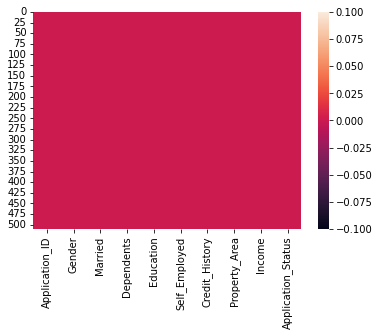

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [31]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


# Univariate analysis

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

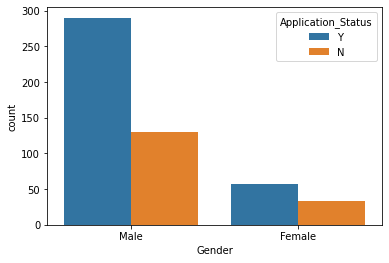

In [32]:
sns.countplot(df['Gender'], hue = df['Application_Status'])

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

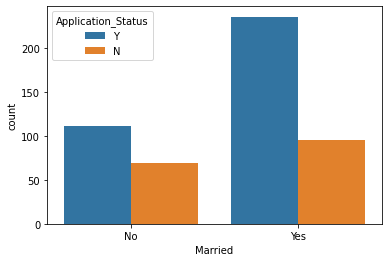

In [33]:
sns.countplot(df['Married'], hue = df['Application_Status'])

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

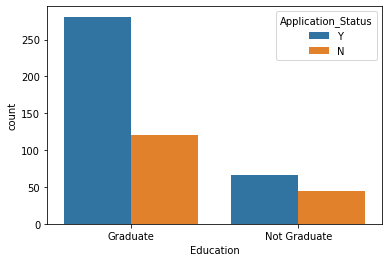

In [34]:
sns.countplot(df['Education'], hue = df['Application_Status'])

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

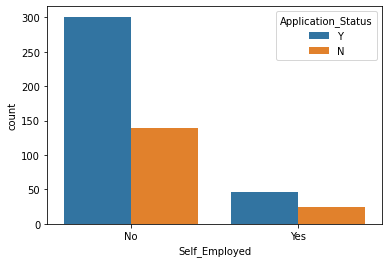

In [35]:
sns.countplot(df['Self_Employed'], hue = df['Application_Status'])

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

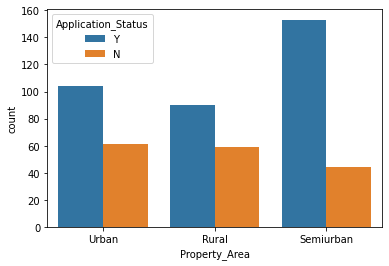

In [36]:
sns.countplot(df['Property_Area'], hue = df['Application_Status'])

C:\Users\abhishek pankaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

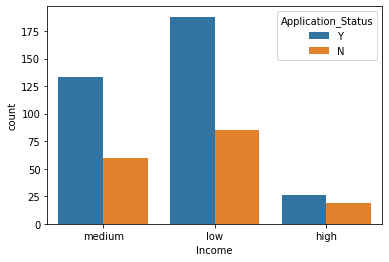

In [37]:
sns.countplot(df['Income'], hue = df['Application_Status'])

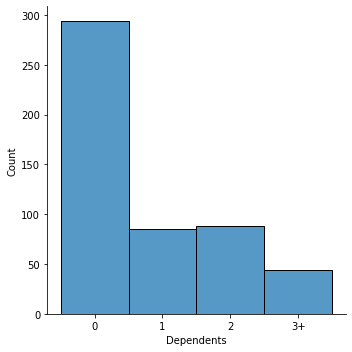

In [38]:
sns.displot(df['Dependents'])

<AxesSubplot:>

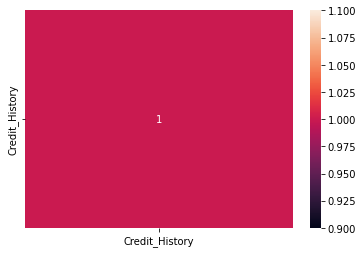

In [39]:
sns.heatmap(df.corr(), annot = True)

In [40]:
df=df.drop('Application_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,Male,No,0,Graduate,No,1,Urban,medium,Y
1,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,Male,No,0,Graduate,No,1,Urban,medium,Y


# One Hot Encoding 

In [41]:
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education' ,'Self_Employed','Property_Area','Income',])
df.head()

,Credit_History,Application_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income_high,Income_low,Income_medium
0,1,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
1,1,N,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
2,1,Y,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,1,Y,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0
4,1,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1


In [42]:
df.keys()

Index(['Credit_History', 'Application_Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Income_high', 'Income_low', 'Income_medium'],
      dtype='object')

In [43]:
df.shape

(511, 20)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Application_Status'],axis=1),df['Application_Status'],test_size=0.2, stratify=df['Application_Status'])

In [45]:
X_train

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income_high,Income_low,Income_medium
407,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0
145,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0
149,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0
376,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0
342,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
193,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
198,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0
188,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1


# Label Encoding for target variable

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [47]:
le.fit(y_train)

LabelEncoder()

In [48]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Feature  Scaling the input datset

In [49]:
from sklearn.preprocessing import StandardScaler 

In [50]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [54]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
lr.score(X_test,y_test)

0.8252427184466019

In [58]:
lr.score(X_train,y_train)

0.803921568627451

In [59]:
mean_absolute_error(y_test,y_pred)

0.17475728155339806

# Gaussian Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred2=nb.predict(X_test)

In [63]:
nb.score(X_test,y_test)

0.7572815533980582

In [64]:
nb.score(X_train,y_train)

0.7892156862745098